Проверка результата

In [12]:
import pandas as pd
from yaml import safe_load
import numpy as np
from matplotlib import pyplot as plt

In [38]:
N_img = 3
H = 100
V = 100
sol = np.zeros((N_img, H, V))
for i in range(N_img):
        stream = open('Solutions/big_sol.yaml', 'r')
        arr = [*(safe_load(stream)[i]['solution']['variables'].values())]
        sol[i] = np.array(arr).reshape(H, V)
        stream.close()
        
print(sol.shape)

(3, 100, 100)


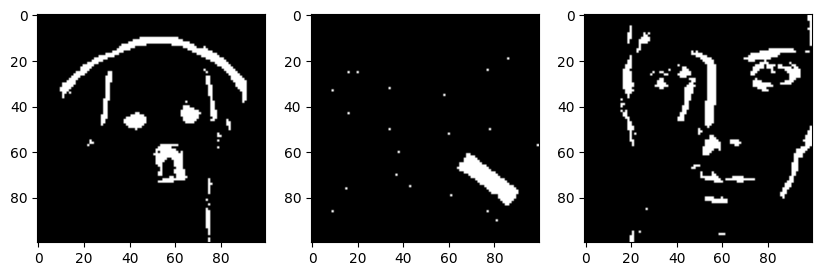

In [40]:
fig, ax = plt.subplots(1, 3, figsize = (10, 15))
ax = ax.flatten()
for j in range(N_img):
    ax[j].imshow(sol[j], cmap = 'gray')

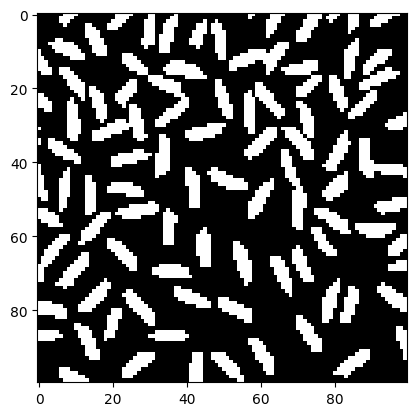

In [37]:
plt.imshow(sol[-1], cmap = 'gray')

In [16]:
stream = open('solution.yaml', 'r')
solution_binary = [*(safe_load(stream)[10]['solution']['variables'].values())]
stream.close()


In [3]:
#данные ручной разметки
df_true

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,7440e9d9-b4ee-42da-8019-c1e3c72d0be2.png,1.0,1.0,1.0,1.0
1,86f4411a-4f4e-4530-aa59-744442dd5a87.png,1.0,1.0,1.0,1.0
2,e37f730b-c3de-4640-90b6-6683d57ffe51.png,0.0,1.0,1.0,0.0
3,ec412acb-a354-4ea1-9893-e2588819ee35.png,1.0,0.0,1.0,1.0
4,2f085f34-ec9e-4af8-8a58-b6b29be3656e.png,0.0,1.0,1.0,1.0
...,...,...,...,...,...
995,33ad250b-816b-4647-bcab-4a0a3e8a7b98.png,1.0,1.0,1.0,1.0
996,d9b63b7b-7b1a-4dde-b518-cde09e087470.png,1.0,1.0,1.0,1.0
997,e2750082-671c-4a63-8616-03d7031e42c6.png,1.0,1.0,0.0,1.0
998,acced5a5-9bbc-4a3f-84dd-b6b259a59e4e.png,1.0,1.0,0.0,1.0


In [4]:
#данные автоматической разметки
df_pred

,Filename,Qubit 1 state,Qubit 2 state,Qubit 3 state,Qubit 4 state
0,760e3945-e0c9-4c9a-b78a-a68fbbee05cd.png,0.0,1.0,1.0,1.0
1,bc09db3b-dedf-49da-946c-efdf2304551b.png,1.0,0.0,1.0,1.0
2,45da543d-c099-4e17-9e18-f3c2776ae8b7.png,0.0,1.0,1.0,1.0
3,fbe18a1d-a194-4581-ad61-8aff1dcf045d.png,1.0,0.0,1.0,1.0
4,ccb1fa64-1a46-4680-82e3-178495a9121c.png,1.0,1.0,0.0,1.0
...,...,...,...,...,...
995,4a108ac6-a2e4-4260-b6fd-857343e9f810.png,1.0,1.0,1.0,1.0
996,e81ee8ae-0565-4f2e-a967-b69a8404e8bf.png,1.0,1.0,1.0,0.0
997,3a051639-3236-40e8-8c4e-9a71186c59d2.png,0.0,1.0,0.0,1.0
998,14a98877-878c-439f-a5f9-1580e2762bb2.png,1.0,1.0,1.0,1.0


In [5]:
df_true['Class'] =  df_true['Qubit 1 state'] * 2**0 + df_true['Qubit 2 state'] * 2**1 + df_true['Qubit 3 state'] * 2**2 + df_true['Qubit 4 state'] * 2**3

df_pred['Class'] =  df_pred['Qubit 1 state'] * 2**0 + df_pred['Qubit 2 state'] * 2**1 + df_pred['Qubit 3 state'] * 2**2 + df_pred['Qubit 4 state'] * 2**3

In [6]:
Category = list(['|0000>', '|0001>','|0010>','|0011>',
                 '|0100>', '|0101>','|0110>','|0111>',
                 '|1000>', '|1001>','|1010>','|1011>',
                 '|1100>', '|1101>','|1110>','|1111>'])

In [7]:
import plotly.express as px

# создадим объект fig, в который поместим столбчатую диаграмму
fig = px.histogram(df_true, x=df_true.Class, nbins=16)

# применим метод .update_layout к объекту fig
fig.update_layout(
    title_text = 'распределение состояния ионов (кубитов) по ручной разметке', # заголовок
    xaxis_title_text = 'State', # подпись к оси x
    yaxis_title_text = 'Count', # подпись к оси y
    bargap = 0.2, # расстояние между столбцами

    # подписи классов на оси x
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        ticktext = Category #['Class 1', 'Class 2', 'Class 3'...]
    )
)

fig.show() #распределение состояния ионов (кубитов) по ручной разметке

In [8]:
import plotly.express as px

# создадим объект fig, в который поместим столбчатую диаграмму
fig = px.histogram(df_true, x=df_true.Class, nbins=16)

# применим метод .update_layout к объекту fig
fig.update_layout(
    title_text = 'распределение состояния ионов (кубитов) по автоматической разметке', # заголовок
    xaxis_title_text = 'State', # подпись к оси x
    yaxis_title_text = 'Count', # подпись к оси y
    bargap = 0.2, # расстояние между столбцами

    # подписи классов на оси x
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
        ticktext = Category #['Class 1', 'Class 2', 'Class 3'...]
    )
)

fig.show() #распределение состояния ионов (кубитов) по ручной разметке

In [9]:
#расчет метрики fidelity

def fidelity(prob_true, prob_pred):
    return np.sqrt((prob_true @ prob_pred)/np.sqrt(prob_true @ prob_true)/np.sqrt(prob_pred @ prob_pred))


In [10]:
import numpy as np
count_true, division = np.histogram(df_true['Class'])
count_pred, division = np.histogram(df_pred['Class'])

prob_true = count_true
prob_pred = count_pred

In [11]:
fidelity(prob_true, prob_pred)

0.9962937363691102